In [1]:
from tensorflow import keras

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
#Normalize the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras import Dense, Flatten

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

c:\Users\Eduar\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6849 - loss: 0.9999 - val_accuracy: 0.8296 - val_loss: 0.5027
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8263 - loss: 0.4975 - val_accuracy: 0.8292 - val_loss: 0.4729
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8441 - loss: 0.4485 - val_accuracy: 0.8596 - val_loss: 0.4127
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8529 - loss: 0.4193 - val_accuracy: 0.8610 - val_loss: 0.3969
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.3987 - val_accuracy: 0.8614 - val_loss: 0.3878
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8643 - loss: 0.3796 - val_accuracy: 0.8686 - val_loss: 0.3703
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3705 - val_accuracy: 0.8692 - val_loss: 0.3760
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.3532 - 

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

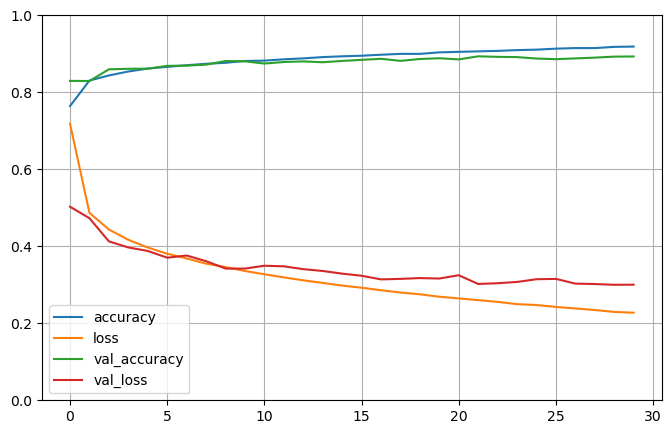

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 58.7889


[60.57011795043945, 0.8553000092506409]

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


In [37]:
# Selecionar as primeiras 3 instâncias do conjunto de teste
X_new = X_test[:10]

# Fazer predições de probabilidade para as novas instâncias
y_proba = model.predict(X_new)

# Arredondar as probabilidades para duas casas decimais para melhor visualização
y_proba_rounded = y_proba.round(2)

# Exibir as probabilidades arredondadas
print(y_proba_rounded)

# Obter as classes previstas (índice da classe com maior probabilidade)
y_pred = np.argmax(y_proba, axis=-1)

# Exibir as classes previstas
print(y_pred)

# Mapear os índices das classes para os nomes das classes
predicted_class_names = np.array(class_names)[y_pred]

# Exibir os nomes das classes previstas
print(predicted_class_names)

# Obter as classes reais das primeiras 3 instâncias do conjunto de teste
y_new = y_test[:10]

# Exibir as classes reais
print(y_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[9 2 1 1 6 1 4 6 5 7]
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker']
[9 2 1 1 6 1 4 6 5 7]
